In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations


ifsp_df = pd.read_excel("C:\\Users\\jtbes\\Documents\\DA8\Projects\\teis_da8_1-granny_pandas\\TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx", sheet_name='Compiled_IFSP Teaming')

kids_df = pd.read_excel("C:\\Users\\jtbes\\Documents\\DA8\Projects\\teis_da8_1-granny_pandas\\TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx", sheet_name='All Children with IFSPs')

In [2]:
covisits = ifsp_df[ifsp_df['IFSP Teaming ID name'] == 'Co-Visit']

In [31]:
ifsp_df = ifsp_df.sort_values(['CHILD_ID', 'SERVICE_DATE'])

In [32]:
ifsp_df = ifsp_df.reset_index(drop=True)

In [34]:
visit_id = 1
visit_ids = []

for index, row in ifsp_df.iterrows():
    if index == 0:
        visit_ids.append(visit_id)
    elif row['CHILD_ID'] == ifsp_df.iloc[index - 1]['CHILD_ID'] and row['SERVICE_DATE'] == ifsp_df.iloc[index - 1]['SERVICE_DATE']:
        visit_ids.append(visit_id)
    else:
        visit_id += 1
        visit_ids.append(visit_id)

ifsp_df['VISIT_ID'] = visit_ids
ifsp_df.head(50)

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,1
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,2
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,3
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community,4
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,5
5,458230,2022-01-21,15:30:00,16:30:00,Telehealth,Service Delivered,BROWNSTEPHANIE,2022-01-26 21:04:15,IFSP Meeting,Sunshine Early Intervention - Knox Cty ARC,EIRA,Dev. Therapy Prof - Home/Community,6
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,7
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,8
8,459167,2022-01-26,09:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2022-02-02 11:57:55,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,9
9,459167,2022-01-26,09:00:00,09:30:00,Home,Service Delivered,CARDENHILLARY,2022-03-08 22:20:07,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy,9


In [6]:
# cleaning strings



pattern_mapping = {
    'Dev': 'Developmental Therapy',
    'Phys': 'Physical Therapy',
    'Occu': 'Occupational Therapy',
    'Speech': 'Speech Therapy'
    'eval_dev': 'Evaluation - Developmental Therapy',
    'eval_vision': 'Evaluation - Vision Services'
}


def clean_service_name(service_name):
    cleaned_name = service_name  
    
    
    for pattern, cleaned_value in pattern_mapping.items():
        if pattern in service_name:
            cleaned_name = cleaned_value
            break
    
    return cleaned_name


covisits['cleaned_service_name'] = covisits['Service Name'].apply(clean_service_name)
covisits

SyntaxError: invalid syntax (2155997998.py, line 10)

In [42]:
visit_counts = ifsp_df['VISIT_ID'].value_counts().reset_index()
visit_counts.columns = ['visit_id', 'counts']
visit_counts.head(500)

,visit_id,counts
0,2546,3
1,6460,3
2,2154,3
3,6279,3
4,6278,3
...,...,...
495,8917,2
496,6482,2
497,6855,2
498,361,2


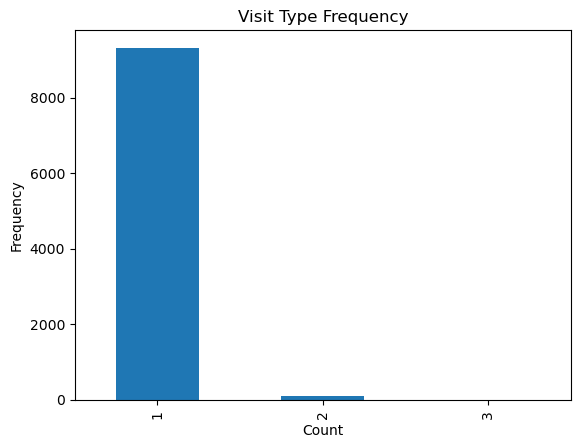

In [19]:
count_frequencies = visit_counts['counts'].value_counts().reset_index()
count_frequencies.columns = ['count', 'frequency']


count_frequencies.plot.bar(x='count', y='frequency', legend=False)


plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Visit Type Frequency')

plt.show()

In [9]:
providers = ifsp_df.groupby('Agency Name').size().reset_index(name = 'service_count')
co_providers = covisits.groupby('Agency Name').size().reset_index(name = 'covisit_count')
merged_df = pd.merge(providers, co_providers, on='Agency Name', how='inner')

merged_df['pct_covisit'] = merged_df['covisit_count']/merged_df['service_count']
merged_df.sort_values(by=['covisit_count', 'pct_covisit'], inplace=True, ascending = False)

merged_df.head(50)

,Agency Name,service_count,covisit_count,pct_covisit
35,LeBonheur EI & Dev (LEAD) (vendor),924,902,0.976190
34,LeBonheur EI & Dev (LEAD) (EIRA),505,340,0.673267
56,Shelby Residential & Voc Svcs(SRVS) (EIRA),323,232,0.718266
67,"Therapy & Learning Center, Inc. (EIRA)",479,216,0.450939
29,"Kid's Putnam, Inc.",445,212,0.476404
47,"Physical Therapy Services, PA (EIRA)",589,181,0.307301
73,"WAVES, Inc.",429,169,0.393939
58,Siskin Children's Institute (EIRA),685,149,0.217518
14,Emory Valley Center,730,138,0.189041
16,Expanding Horizons - ETSU,192,130,0.677083


In [10]:
agency_type = covisits.groupby('Agency Type').size().reset_index(name = 'covisit_count')
agency_type

,Agency Type,covisit_count
0,EIRA,2677
1,Independent,1414


In [11]:
service_type = covisits.groupby('service_name').size().reset_index(name = 'covisit_count')
service_type

KeyError: 'cleaned_service_name'

In [67]:
from itertools import combinations
pd.set_option('display.max_colwidth', None)

visit_grouped = covisits.groupby('VISIT_ID')['Service Name'].apply(list).reset_index()


visit_grouped['service_pairs'] = visit_grouped['Service Name'].apply(lambda x: list(combinations(x, 2)))


service_pairs = [pair for pairs in visit_grouped['service_pairs'] for pair in pairs]
service_pairs_sorted = [tuple(sorted(pair)) for pair in service_pairs]

pair_counts = pd.Series(service_pairs_sorted).value_counts().reset_index()
pair_counts.columns = ['service_pair', 'count']


pair_counts = pair_counts.sort_values('count', ascending=False)
pair_counts

,service_pair,count
0,"(Dev. Therapy Prof - Home/Community, Physical Therapy)",87
1,"(Occupational Therapy, Physical Therapy)",86
2,"(Dev. Therapy Prof - Home/Community, Occupational Therapy)",75
3,"(Dev. Therapy Prof - Home/Community, Speech Therapy)",71
4,"(Occupational Therapy, Speech Therapy)",53
5,"(Dev. Therapy - BCBA, Dev. Therapy Prof - Home/Community)",37
6,"(Dev. Therapy - BCBA, Speech Therapy)",24
7,"(Physical Therapy, Speech Therapy)",22
8,"(Dev. Therapy Prof - Home/Community, Vision Services)",19
9,"(Dev. Therapy - BCBA, Occupational Therapy)",13


In [13]:
agency_grouped = covisits.groupby('VISIT_ID')['Agency Name'].apply(list).reset_index()


agency_grouped['agency_pairs'] = agency_grouped['Agency Name'].apply(lambda x: list(combinations(x, 2)))


agency_pairs = [pair for pairs in agency_grouped['agency_pairs'] for pair in pairs]
agency_pairs_sorted = [tuple(sorted(pair)) for pair in agency_pairs]

apair_counts = pd.Series(agency_pairs_sorted).value_counts().reset_index()
apair_counts.columns = ['agency_pair', 'count']


apair_counts = apair_counts.sort_values('count', ascending=False)
apair_counts

,agency_pair,count
0,"(LeBonheur EI & Dev (LEAD) (vendor), LeBonheur EI & Dev (LEAD) (vendor))",176
1,"(LeBonheur EI & Dev (LEAD) (EIRA), LeBonheur EI & Dev (LEAD) (vendor))",170
2,"(Therapeutic Rehab Services - Cathy Otis, Therapeutic Rehab Services - Cathy Otis)",24
3,"(Therapy & Learning Center Inc (vendor WTCCD), Therapy & Learning Center, Inc. (EIRA))",18
4,"(Erlanger Health Care System/TC Thompson's Children, Erlanger Health Care System/TC Thompson's Children)",16
5,"(Shelby Residential & Voc Svcs(SRVS) (EIRA), Shelby Residential & Voc Svcs(SRVS) (EIRA))",10
6,"(KF Pediatric Therapy, Siskin Children's Institute (EIRA))",9
7,"(KF Pediatric Therapy, Signal Centers, Inc.)",9
8,"(WAVES, Inc., WAVES, Inc.)",8
9,"(LeBonheur EI & Dev (LEAD) (EIRA), Shelby Residential & Voc Svcs(SRVS) (EIRA))",8


In [20]:
user_visits = ifsp_df.groupby('ADD_USER').size().reset_index(name = 'visit_count')
user_covisits = covisits.groupby('ADD_USER').size().reset_index(name = 'covisit_count')
merged_users = pd.merge(user_visits, user_covisits, on='ADD_USER', how='inner')

merged_users['pct_covisit'] = merged_users['covisit_count']/merged_users['visit_count']
merged_users.sort_values(by=['visit_count', 'pct_covisit'], inplace=True, ascending = False)
merged_users.head(50)

,ADD_USER,visit_count,covisit_count,pct_covisit
332,ROGERSKALEY,225,174,0.773333
319,REDDMISSY,199,199,1.000000
313,PULLIAMAMY,140,129,0.921429
286,OLIVERCIARA,129,123,0.953488
147,HARRISKATE,118,51,0.432203
43,CALLICUTTJULIE,107,107,1.000000
360,SOSEBEEJULIE1,107,107,1.000000
414,WISHARTJENNIFER,94,13,0.138298
121,GAFFORDLINDASRVS,76,76,1.000000
323,REYNOLDSKAJUANDALEAD,76,76,1.000000


In [15]:
print(covisits['cleaned_service_name'].unique()) ## cleaning didn't quite work. revisit Tues

KeyError: 'cleaned_service_name'

In [44]:
solo_visits = visit_counts[visit_counts['counts']==1]
solo_visits = solo_visits.sort_values(by='visit_id')
solo_visits.head(50)

,visit_id,counts
1392,1,1
7412,2,1
6102,3,1
6101,4,1
6100,5,1
6099,6,1
6098,7,1
6097,8,1
6096,11,1
6095,12,1


In [76]:
subset_ifsp = ifsp_df[ifsp_df['VISIT_ID'].isin(solo_visits['visit_id'])]
subset_ifsp

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,1
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,2
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,3
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community,4
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,541337,2023-01-10,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,2023-01-12 17:55:59,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8964
9539,541511,2023-01-19,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,2023-01-20 16:11:04,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8965
9540,541890,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8966
9541,542077,2023-01-30,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,2023-01-30 15:21:59,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community,8967


In [77]:
subset_covisits = subset_ifsp[subset_ifsp['IFSP Teaming ID name'] == 'Co-Visit']
subset_covisits

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,2
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,7
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,8
14,459566,2022-03-14,10:00:00,11:00:00,Community-based,Service Delivered,VALADIEMICHELLE,2022-03-14 14:27:51,Co-Visit,"Signal Centers, Inc.",EIRA,Dev. Therapy Prof - Home/Community,11
18,460456,2022-01-12,09:00:00,10:00:00,Telehealth,Service Delivered,MOTLEYKATIE1,2022-01-13 12:57:57,Co-Visit,Susan Gray School - Vanderbilt Univ,EIRA,Dev. Therapy Prof - Home/Community,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,540954,2023-01-27,10:35:00,11:33:00,Other,Service Delivered,SPRADLINGSARAH,2023-01-27 15:21:18,Co-Visit,Rainbow Early Intervention (HATS),EIRA,Dev. Therapy Prof - Home/Community,8963
9538,541337,2023-01-10,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,2023-01-12 17:55:59,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8964
9539,541511,2023-01-19,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,2023-01-20 16:11:04,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8965
9540,541890,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8966


In [54]:
sub_agency_co = subset_covisits.groupby('Agency Name').size().reset_index(name = 'solo_covisit_count')
sub_agency_co = sub_agency_co.sort_values(by='solo_covisit_count', ascending = False)
sub_agency_co

,Agency Name,solo_covisit_count
33,LeBonheur EI & Dev (LEAD) (vendor),409
28,"Kid's Putnam, Inc.",212
61,"Therapy & Learning Center, Inc. (EIRA)",191
51,Shelby Residential & Voc Svcs(SRVS) (EIRA),190
44,"Physical Therapy Services, PA (EIRA)",180
...,...,...
62,Therapy.Works LLC,1
63,"Trillium Speech, Language and Voice Svcs, LLC",1
6,Choice Medical Inc / Choice Orthotics Prosthetics,1
26,"Jon Allen, OTR/L",1


In [55]:
sub_provider_co = subset_covisits.groupby('ADD_USER').size().reset_index(name = 'solo_covisit_count')
sub_provider_co = sub_provider_co.sort_values(by='solo_covisit_count', ascending = False)
sub_provider_co

,ADD_USER,solo_covisit_count
302,ROGERSKALEY,174
330,SOSEBEEJULIE1,105
289,REDDMISSY,94
109,GAFFORDLINDASRVS,76
259,OLIVERCIARA,59
...,...,...
204,LEWISENDIA,1
210,LYNNCHRYSTAL,1
214,MANISLISA,1
219,MCCONNELLBRITNEY,1


In [81]:
# who is performing co-visits

user_visits = ifsp_df.groupby('ADD_USER').size().reset_index(name = 'visit_count')
user_covisits = covisits.groupby('ADD_USER').size().reset_index(name = 'covisit_count')
merged_users = pd.merge(user_visits, user_covisits, on='ADD_USER', how='inner')
adj_user_co = ifsp_df[ifsp_df['IFSP Teaming ID name'] == 'Co-Visit'].groupby('ADD_USER')['VISIT_ID'].nunique().reset_index(name='adj_covisits')
merged_users_adj = pd.merge(merged_users, adj_user_co, on='ADD_USER', how='inner')

merged_users_adj['pct_covisit'] = merged_users['covisit_count']/merged_users['visit_count']
merged_users_adj.sort_values(by=['covisit_count', 'pct_covisit'], inplace=True, ascending = False)
merged_users_adj.head(10)

,ADD_USER,visit_count,covisit_count,adj_covisits,pct_covisit
319,REDDMISSY,199,199,199,1.000000
332,ROGERSKALEY,225,174,174,0.773333
313,PULLIAMAMY,140,129,128,0.921429
286,OLIVERCIARA,129,123,123,0.953488
43,CALLICUTTJULIE,107,107,107,1.000000
360,SOSEBEEJULIE1,107,107,107,1.000000
121,GAFFORDLINDASRVS,76,76,76,1.000000
323,REYNOLDSKAJUANDALEAD,76,76,76,1.000000
48,CARRELIZABETH,73,73,73,1.000000
47,CARDENHILLARY,58,57,57,0.982759


In [63]:
# who is performing co-visits

providers = ifsp_df.groupby('Agency Name').size().reset_index(name = 'service_count')
co_providers = covisits.groupby('Agency Name').size().reset_index(name = 'covisit_count')
merged_df = pd.merge(providers, co_providers, on='Agency Name', how='inner')

merged_df['pct_covisit'] = merged_df['covisit_count']/merged_df['service_count']
merged_df.sort_values(by=['covisit_count', 'pct_covisit'], inplace=True, ascending = False)

merged_df.head(10)

,Agency Name,service_count,covisit_count,pct_covisit
35,LeBonheur EI & Dev (LEAD) (vendor),924,902,0.976190
34,LeBonheur EI & Dev (LEAD) (EIRA),505,340,0.673267
56,Shelby Residential & Voc Svcs(SRVS) (EIRA),323,232,0.718266
67,"Therapy & Learning Center, Inc. (EIRA)",479,216,0.450939
29,"Kid's Putnam, Inc.",445,212,0.476404
47,"Physical Therapy Services, PA (EIRA)",589,181,0.307301
73,"WAVES, Inc.",429,169,0.393939
58,Siskin Children's Institute (EIRA),685,149,0.217518
14,Emory Valley Center,730,138,0.189041
16,Expanding Horizons - ETSU,192,130,0.677083


In [78]:
# who is performing co-visits

service_name = ifsp_df.groupby('Service Name').size().reset_index(name = 'service_count')
service_co = covisits.groupby('Service Name').size().reset_index(name = 'covisit_count')
merged_serv = pd.merge(service_name, service_co, on='Service Name', how='inner')

merged_serv['pct_covisit'] = merged_serv['covisit_count']/merged_serv['service_count']
merged_serv.sort_values(by=['covisit_count', 'pct_covisit'], inplace=True, ascending = False)

merged_serv.head(25)

,Service Name,service_count,covisit_count,pct_covisit
4,Dev. Therapy Prof - Home/Community,7671,2400,0.312867
12,Occupational Therapy,515,502,0.974757
16,Speech Therapy,448,425,0.948661
14,Physical Therapy,316,307,0.971519
1,Dev. Therapy - BCBA,144,133,0.923611
3,Dev. Therapy Center-Based,154,102,0.662338
18,Vision Services,63,60,0.952381
6,Eval/Assess - Developmental,72,52,0.722222
15,Physical Therapy Assistant,32,32,1.000000
8,Evaluation - Occupational Therapy,26,26,1.000000


In [66]:
# who is performing co-visits

agency_type = covisits.groupby('Agency Type').size().reset_index(name = 'covisit_count')
agency_type

,Agency Type,covisit_count
0,EIRA,2677
1,Independent,1414


In [68]:
# Are they generally performed by the same provider or discipline or by multiple providers or disciplines?
# of the listed co-visit pairs:


pd.set_option('display.max_colwidth', None)

visit_grouped = covisits.groupby('VISIT_ID')['Service Name'].apply(list).reset_index()


visit_grouped['service_pairs'] = visit_grouped['Service Name'].apply(lambda x: list(combinations(x, 2)))


service_pairs = [pair for pairs in visit_grouped['service_pairs'] for pair in pairs]
service_pairs_sorted = [tuple(sorted(pair)) for pair in service_pairs]

pair_counts = pd.Series(service_pairs_sorted).value_counts().reset_index()
pair_counts.columns = ['service_pair', 'count']


pair_counts = pair_counts.sort_values('count', ascending=False)
pair_counts

,service_pair,count
0,"(Dev. Therapy Prof - Home/Community, Physical Therapy)",87
1,"(Occupational Therapy, Physical Therapy)",86
2,"(Dev. Therapy Prof - Home/Community, Occupational Therapy)",75
3,"(Dev. Therapy Prof - Home/Community, Speech Therapy)",71
4,"(Occupational Therapy, Speech Therapy)",53
5,"(Dev. Therapy - BCBA, Dev. Therapy Prof - Home/Community)",37
6,"(Dev. Therapy - BCBA, Speech Therapy)",24
7,"(Physical Therapy, Speech Therapy)",22
8,"(Dev. Therapy Prof - Home/Community, Vision Services)",19
9,"(Dev. Therapy - BCBA, Occupational Therapy)",13


In [69]:
# Are they generally performed by the same provider or discipline or by multiple providers or disciplines?
# of the listed co-visit pairs:

agency_grouped = covisits.groupby('VISIT_ID')['Agency Name'].apply(list).reset_index()


agency_grouped['agency_pairs'] = agency_grouped['Agency Name'].apply(lambda x: list(combinations(x, 2)))


agency_pairs = [pair for pairs in agency_grouped['agency_pairs'] for pair in pairs]
agency_pairs_sorted = [tuple(sorted(pair)) for pair in agency_pairs]

apair_counts = pd.Series(agency_pairs_sorted).value_counts().reset_index()
apair_counts.columns = ['agency_pair', 'count']


apair_counts = apair_counts.sort_values('count', ascending=False)
apair_counts

,agency_pair,count
0,"(LeBonheur EI & Dev (LEAD) (vendor), LeBonheur EI & Dev (LEAD) (vendor))",176
1,"(LeBonheur EI & Dev (LEAD) (EIRA), LeBonheur EI & Dev (LEAD) (vendor))",170
2,"(Therapeutic Rehab Services - Cathy Otis, Therapeutic Rehab Services - Cathy Otis)",24
3,"(Therapy & Learning Center Inc (vendor WTCCD), Therapy & Learning Center, Inc. (EIRA))",18
4,"(Erlanger Health Care System/TC Thompson's Children, Erlanger Health Care System/TC Thompson's Children)",16
5,"(Shelby Residential & Voc Svcs(SRVS) (EIRA), Shelby Residential & Voc Svcs(SRVS) (EIRA))",10
6,"(KF Pediatric Therapy, Siskin Children's Institute (EIRA))",9
7,"(KF Pediatric Therapy, Signal Centers, Inc.)",9
8,"(WAVES, Inc., WAVES, Inc.)",8
9,"(LeBonheur EI & Dev (LEAD) (EIRA), Shelby Residential & Voc Svcs(SRVS) (EIRA))",8


In [75]:
# Are they generally performed by the same provider or discipline or by multiple providers or disciplines?
# of the listed co-visit pairs:

user_grouped = covisits.groupby('VISIT_ID')['ADD_USER'].apply(list).reset_index()


user_grouped['user_pairs'] = user_grouped['ADD_USER'].apply(lambda x: list(combinations(x, 2)))


user_pairs = [pair for pairs in user_grouped['user_pairs'] for pair in pairs]
user_pairs_sorted = [tuple(sorted(pair)) for pair in user_pairs]

user_counts = pd.Series(user_pairs_sorted).value_counts().reset_index()
user_counts.columns = ['user_pair', 'count']


user_counts = user_counts.sort_values('count', ascending=False)
user_counts.head(50)

,user_pair,count
0,"(CALLICUTTJULIE, REDDMISSY)",45
1,"(REDDMISSY, REYNOLDSKAJUANDALEAD)",23
2,"(CALLICUTTJULIE, OLIVERCIARA)",20
3,"(OLIVERCIARA, REDDMISSY)",18
4,"(LICHTSTACY, OTISCATHY)",18
5,"(OLIVERCIARA, REYNOLDSKAJUANDALEAD)",16
6,"(OLIVERCIARA, PULLIAMAMY)",16
7,"(CARRELIZABETH, RIDDLEMELISSA)",16
8,"(HAMILTONHANNAH, PULLIAMAMY)",14
9,"(HAMILTONHANNAH, LEEAMBER)",10
